# Optymalizacja reguły PPMF 

In [1]:
library(tidyverse)
library(magrittr)
library(furrr)
library(here)
library(gghighlight)
options(repr.plot.width=20, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: future
here() starts at /home/ewarchul/cma-es-exp


In [2]:
source(here::here("src", "alg", "cma-es-csa.R"))
source(here::here("src", "alg", "cma-es-quant.R"))
source(here::here("src", "exp-utils.R"))
source(here::here("src", "data-utils.R"))
source(here::here("src", "plot-funcs.R"))
source(here::here("src", "eval-funcs.R"))

In [3]:
alg = 
    cma_es_quant

In [4]:
eval_func = 
    . %>% crossprod(.) 

# "Fabryka" CMA-ESów
alg_factory = function(quant_val) {
    expand.grid(
        qval = quant_val
    ) %>%
    purrr::pmap(function(qval) {
     purrr::partial(alg, control = list(quant_val = qval))    
    })
}

In [5]:
q_val = 
    seq(0.01, 0.9, 0.025)

In [6]:
# Lista zawierająca funkcje cma_es_expth z różnymi wartościami parametrów

algs = 
    alg_factory(q_val)

In [7]:
algs %>% length()

[1] 36

## D = 10 & Func = sphere

In [8]:
experiments_d10 = 
    do_experiment(
        methods = c(cma_es_csa, algs),
        func = eval_func,
        dim = 10,
        x0 = 100,
        lower = -100,
        upper = 100
    )

Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preser

label_key: method


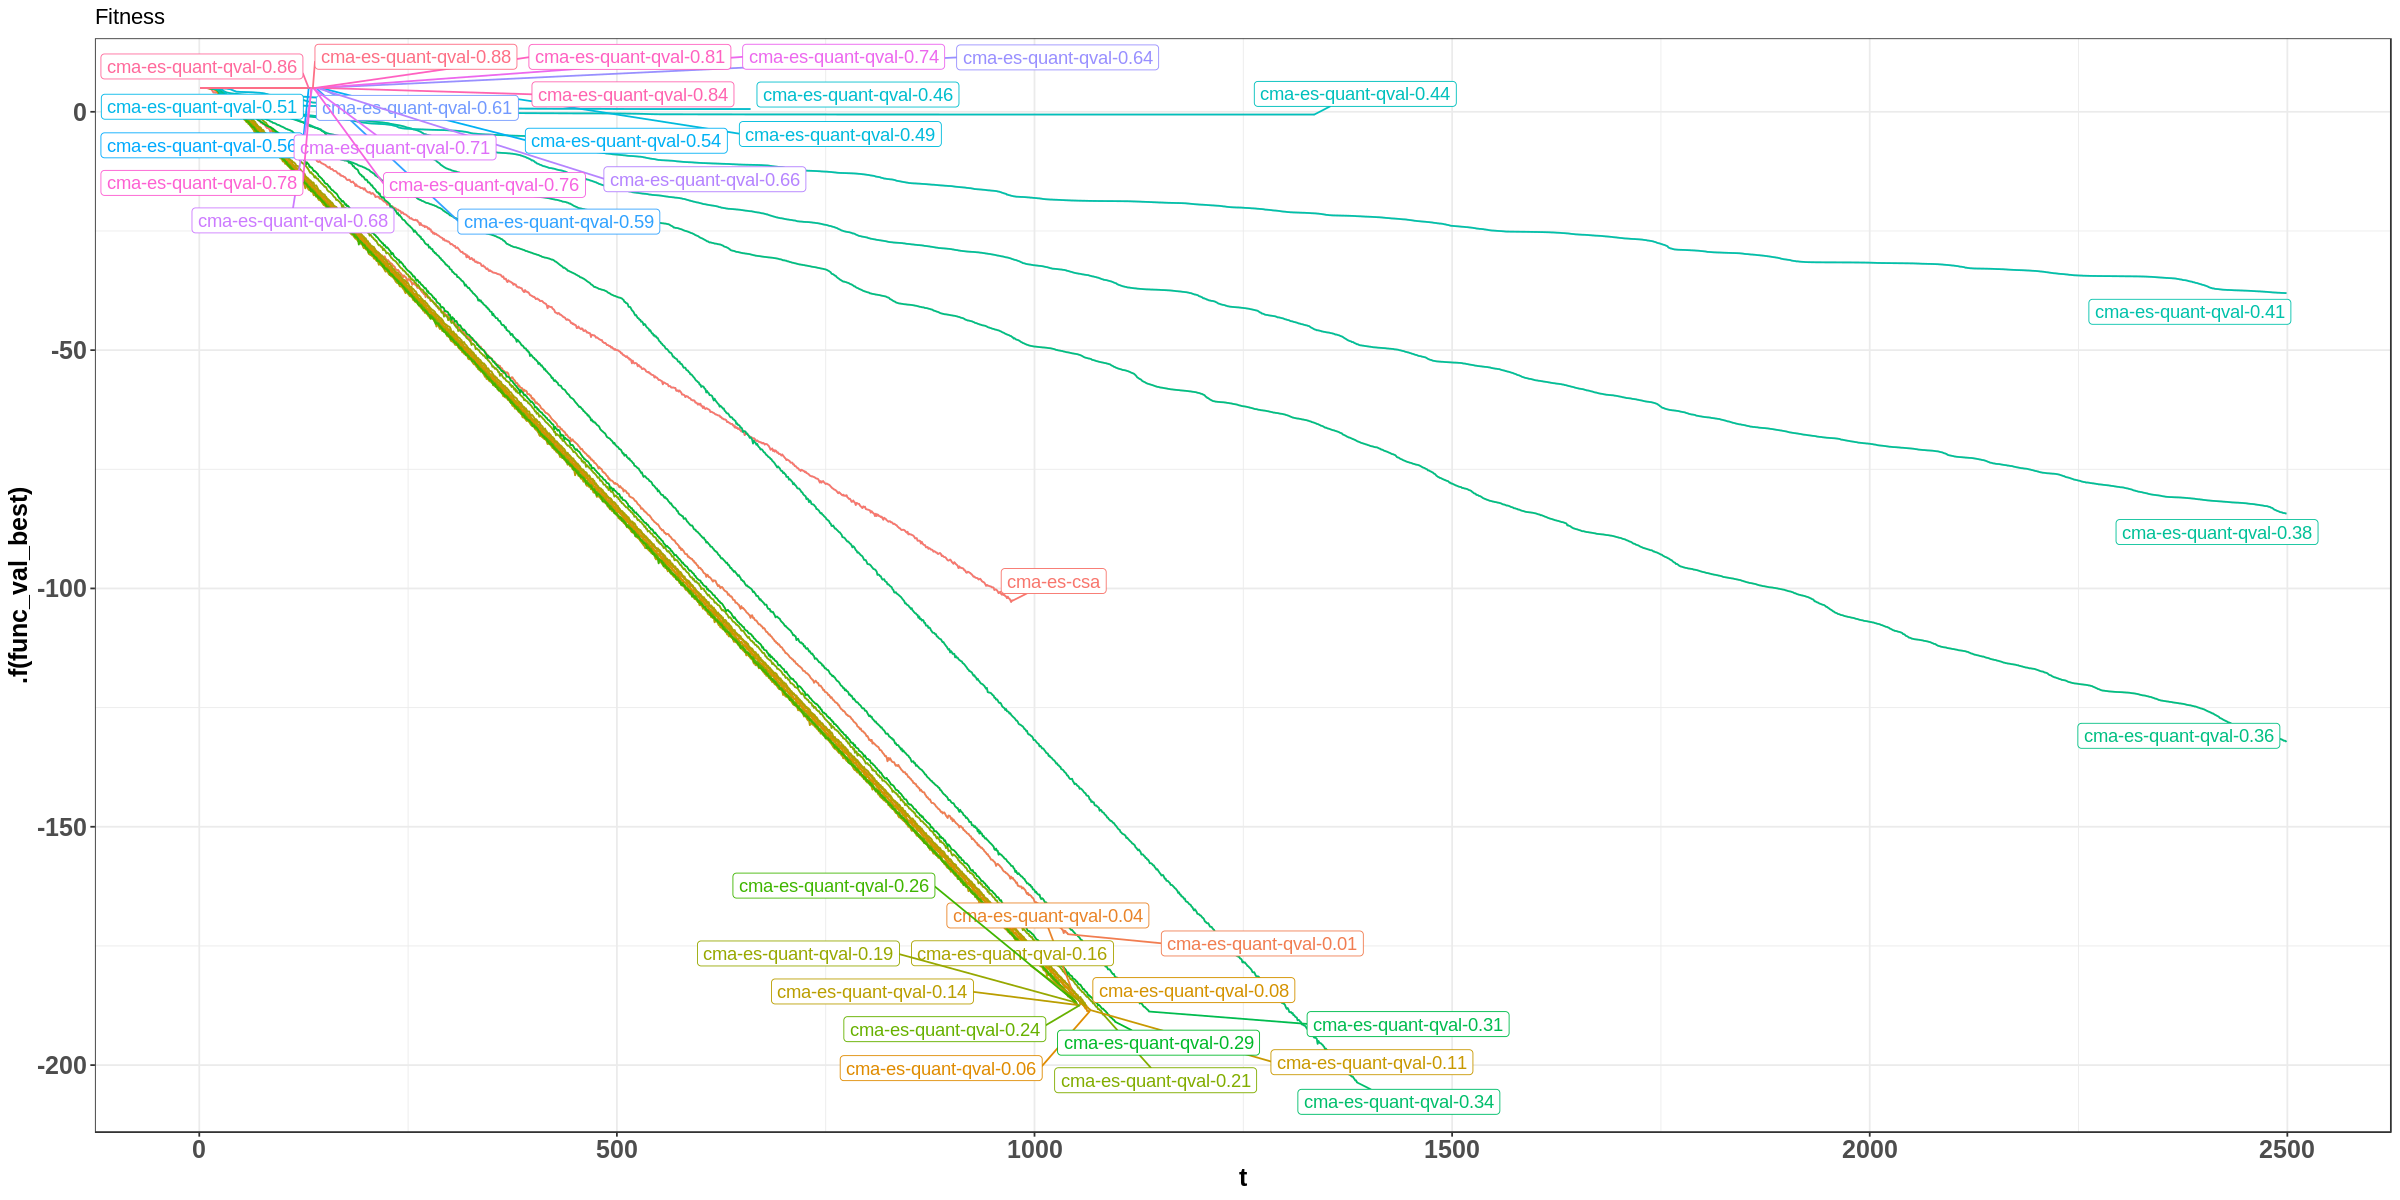

In [12]:
experiments_d10 %>%
    value_plot(.f = log10) +
    gghighlight::gghighlight(is.character(method), use_direct_label = T)
   

## D = 30 & Func = sphere

In [9]:
experiments_d30 = 
    do_experiment(
        methods = c(cma_es_csa, algs),
        func = eval_func,
        dim = 30,
        x0 = 100,
        lower = -100,
        upper = 100
    )

Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preser

label_key: method


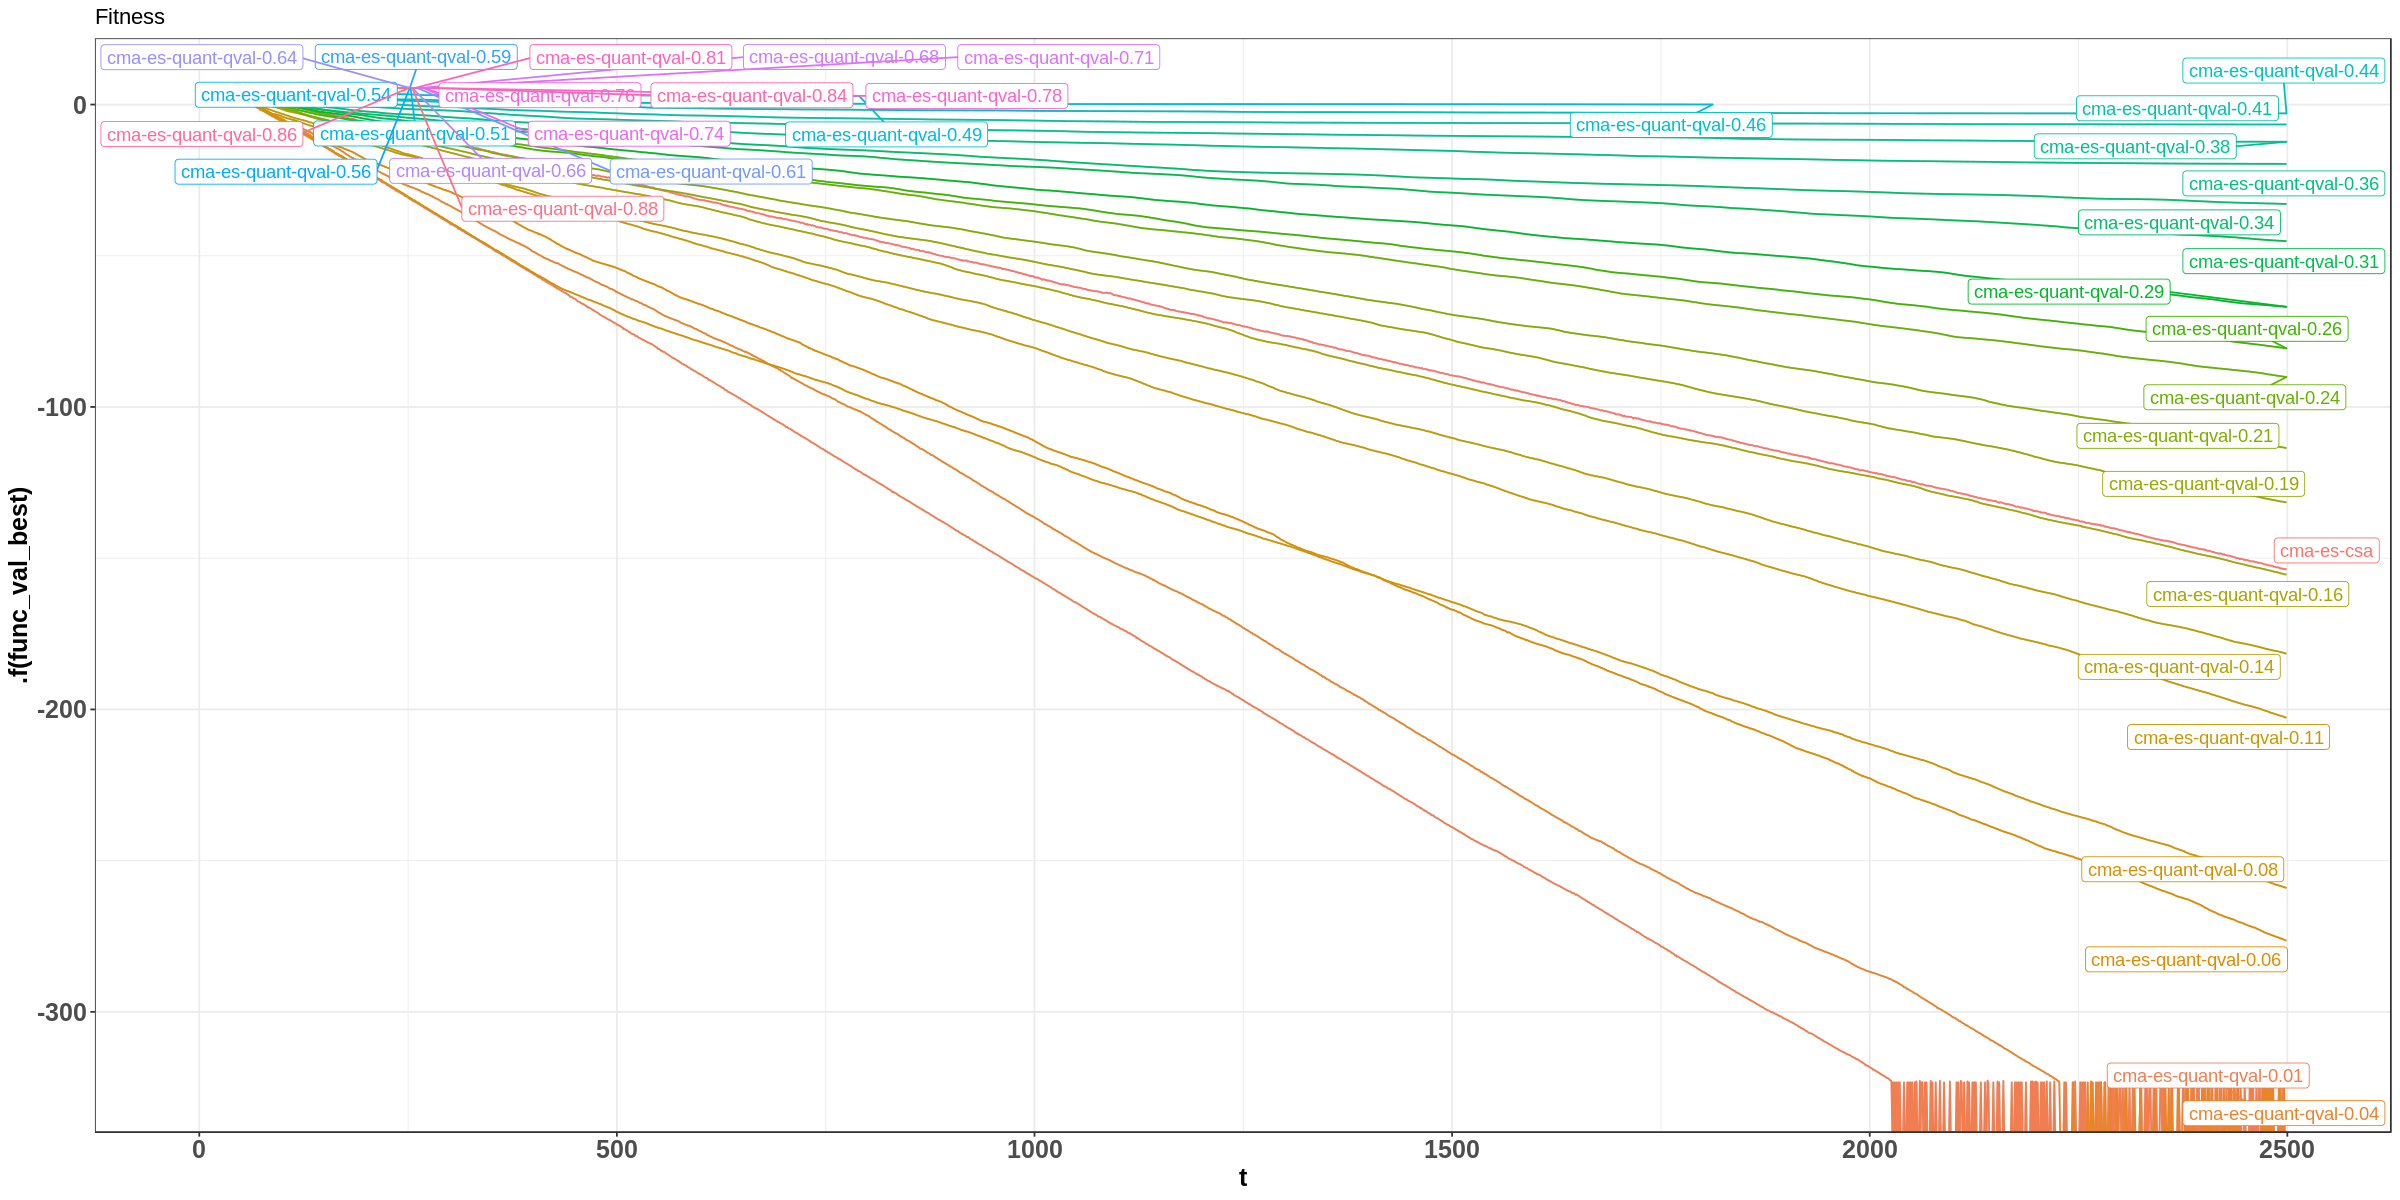

In [13]:
experiments_d30 %>%
    value_plot(.f = log10) +
    gghighlight::gghighlight(is.character(method), use_direct_label = T)
    

## D = 10 & Func = Rastrigin

In [ ]:
experiments_d10_rastr = 
    do_experiment(
        methods = c(cma_es_csa, algs),
        func = rastrigin_func,
        dim = 10,
        x0 = 100,
        lower = -100,
        upper = 100
    )

label_key: method


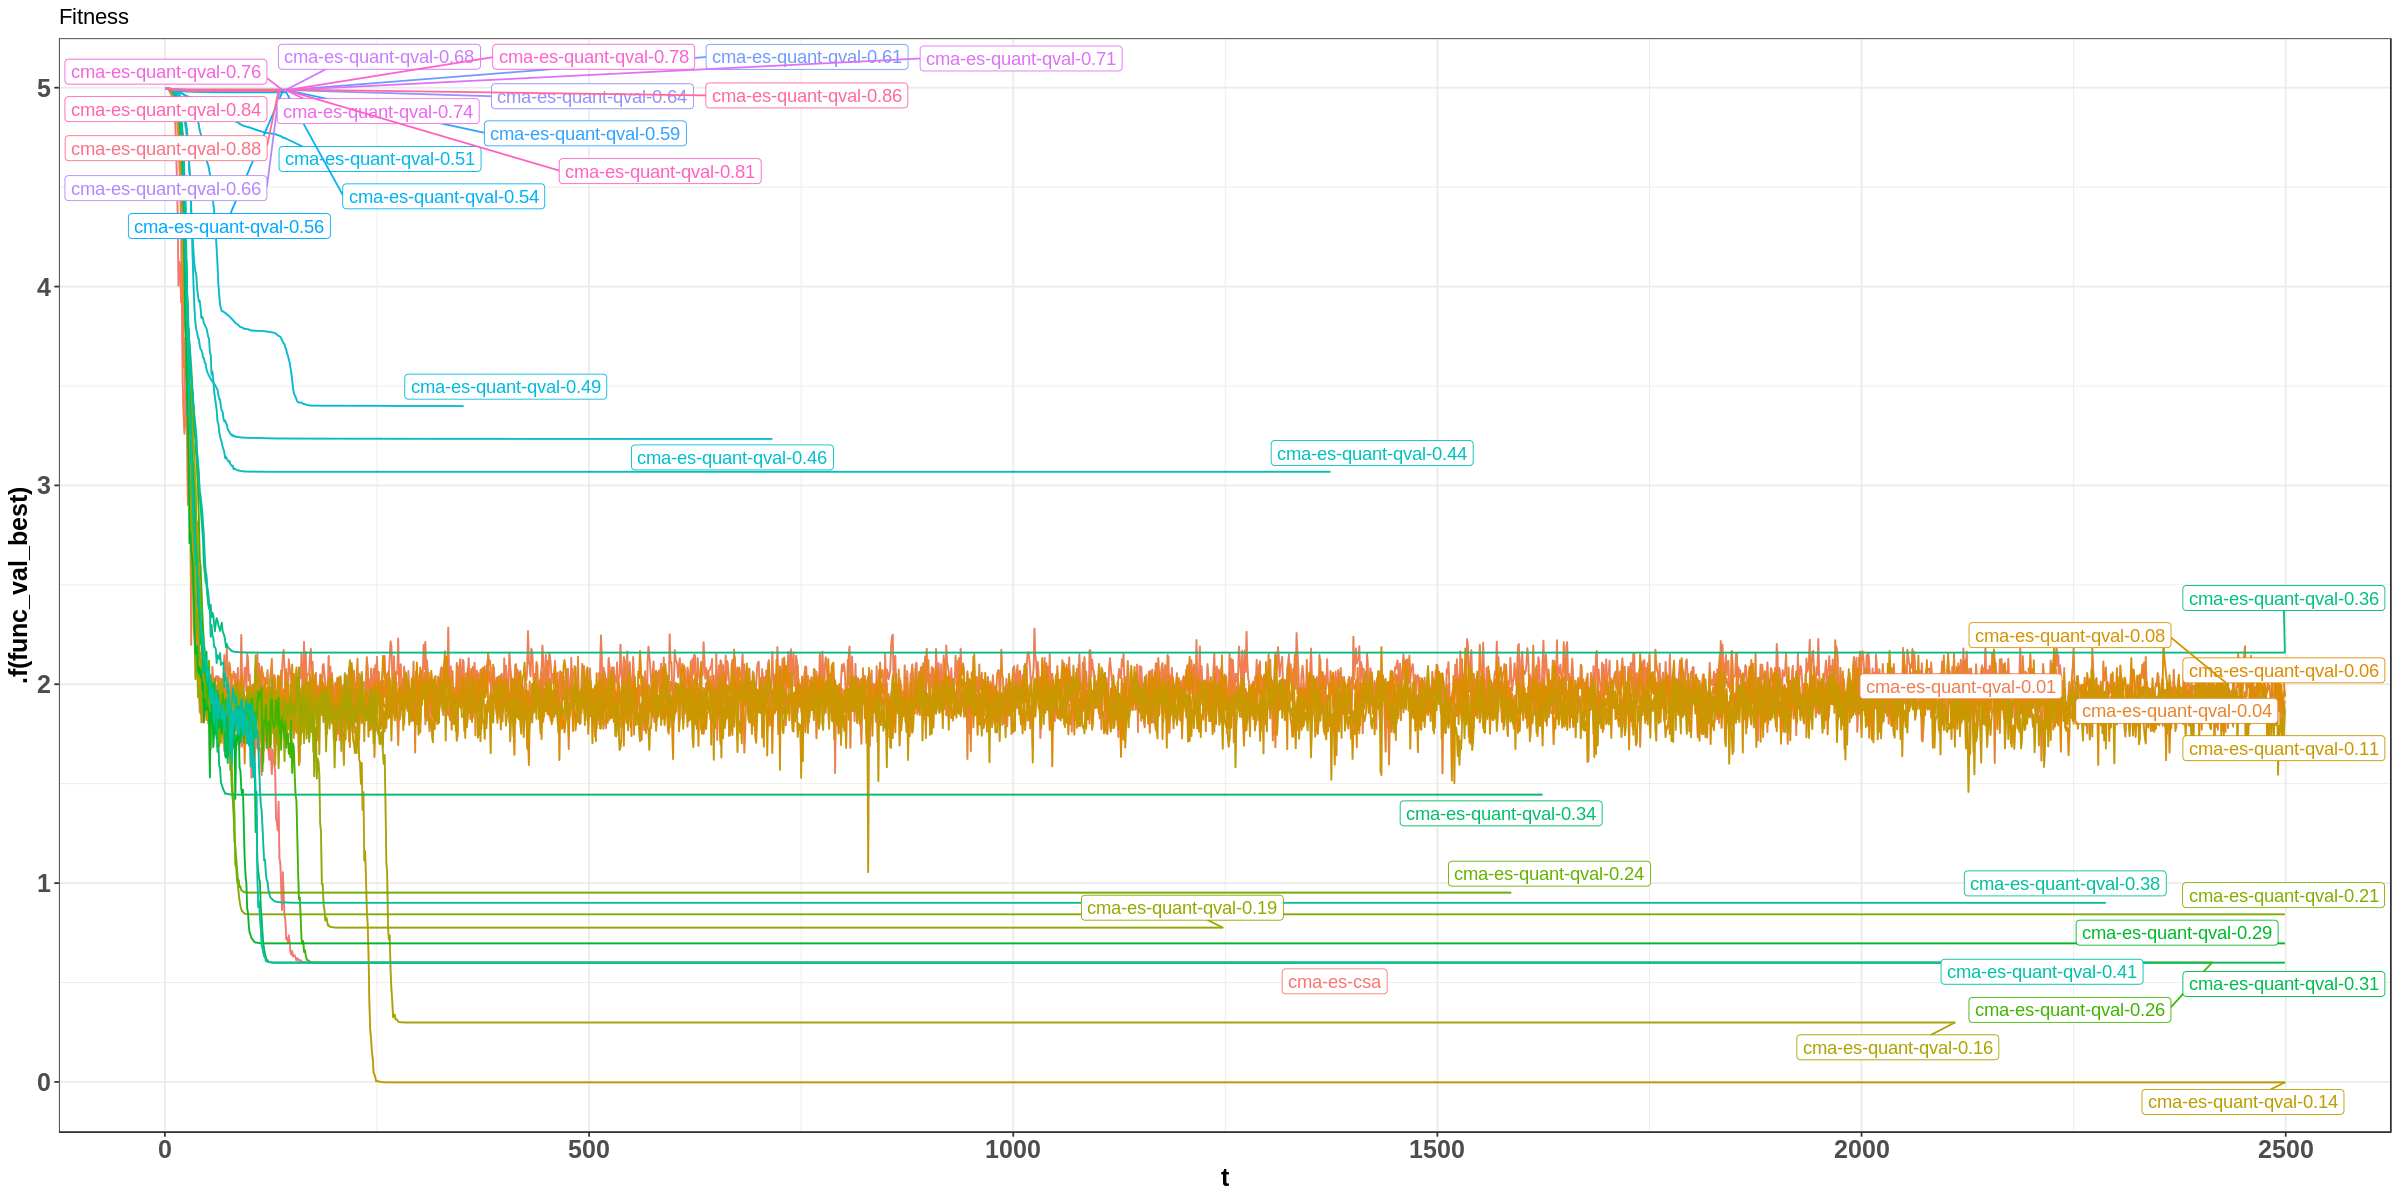

In [14]:
experiments_d10_rastr %>%
    value_plot(.f = log10) +
    gghighlight::gghighlight(is.character(method), use_direct_label = T)
   

## D = 30 & Func = Rastrigin

In [11]:
experiments_d30_rastr = 
    do_experiment(
        methods = c(cma_es_csa, algs),
        func = rastrigin_func,
        dim = 30,
        x0 = 100,
        lower = -100,
        upper = 100
    )

Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preser

label_key: method


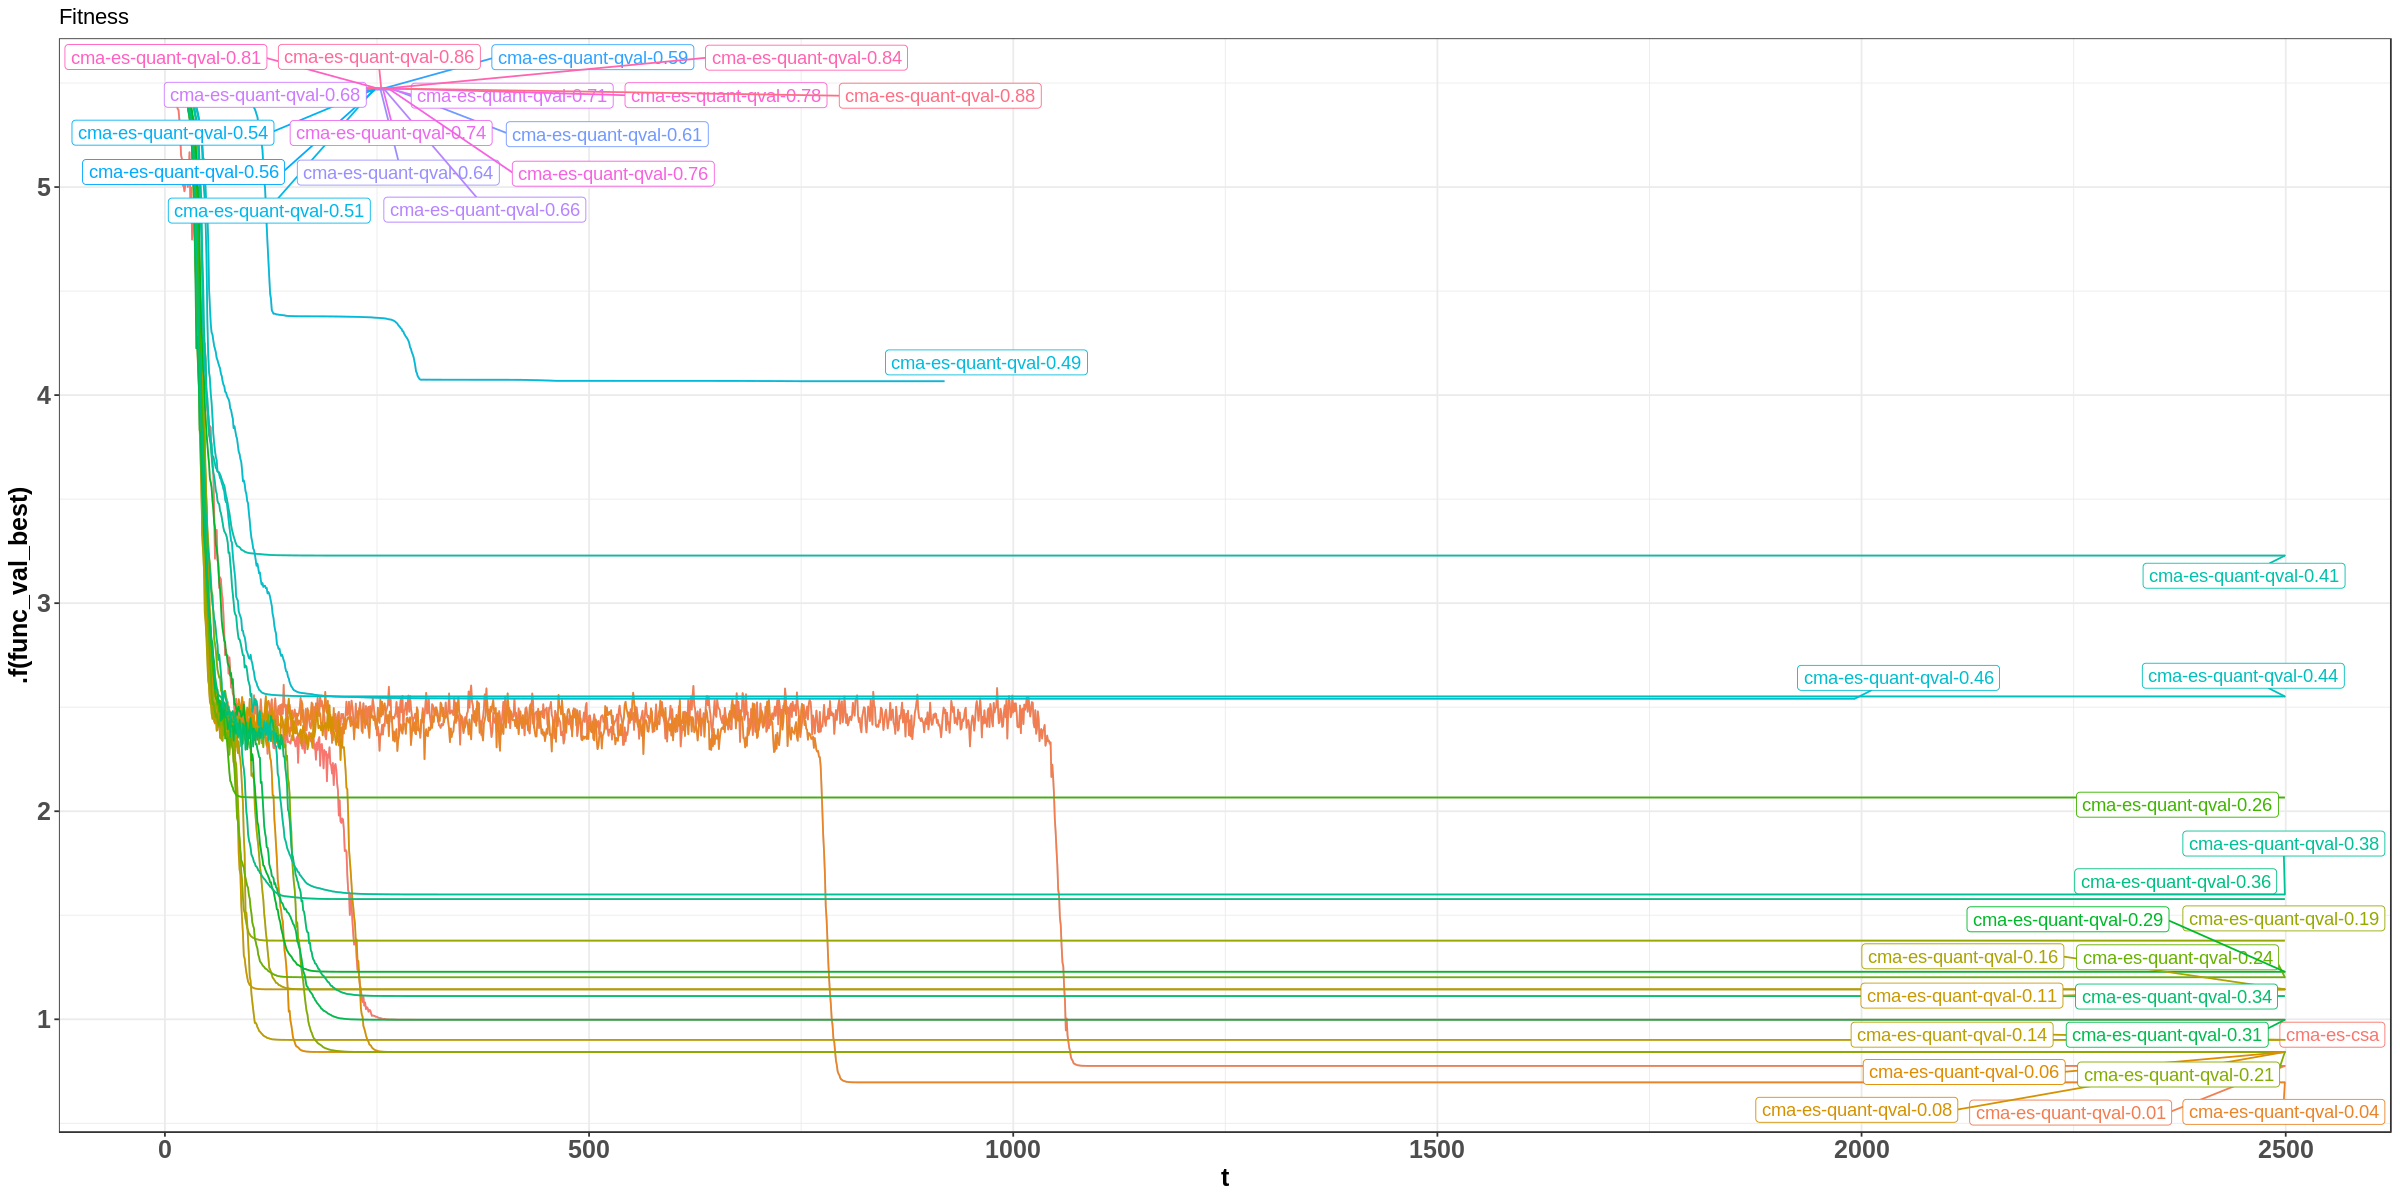

In [15]:
experiments_d30_rastr %>%
    value_plot(.f = log10) +
    gghighlight::gghighlight(is.character(method), use_direct_label = T)
    